In [1]:
# from sklearn.datasets import fetch_openml
import pickle
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


with open('/home/dmytro/Desktop/hands_on_ml/classification_p121/mnist.pickle', 'rb') as f:
    mnist = pickle.load(f)

# Prepare data
X = mnist['data']
y = mnist['target'].astype('int')

X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5 = y_train_5.astype('int')
y_test_5 = y_test_5.astype('int')





# Training a Binary Classifier
sgd_clf = SGDClassifier(random_state=266)
sgd_clf.fit(X_train, y_train_5)
print(sgd_clf.score(X_test, y_test_5))

0.965


In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=4, scoring="accuracy")


array([0.92566667, 0.93673333, 0.96273333, 0.968     ])

In [3]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# To compute the confusion matrix, you first need to have a set of predictions so
# that they can be compared to the actual targets. You could make predictions on
# the test set, but let’s keep it untouched for now (remember that you want to use
# the test set only at the very end of your project, once you have a classifier that
# you are ready to launch). Instead, you can use the cross_val_predict()
# function:

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred
confusion_matrix(y_train_5, y_train_pred)

array([[53248,  1331],
       [ 1124,  4297]])

In [4]:
# The confusion matrix gives you a lot of information, but sometimes you may
# prefer a more concise metric.

# Precision and Recall
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

f1_score(y_train_5, y_train_pred)


# precision/recall tradeoff
# How do you decide which threshold to use? First, use the
# cross_val_predict()

# With these scores, use the precision_recall_curve() function to compute
# precision and recall for all possible thresholds:

from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")



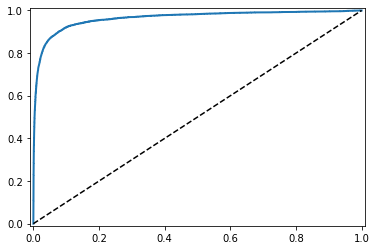

In [17]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

# The ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

plot_roc_curve(fpr, tpr,label='ROC')
plt.margins(x=0.01, y=0.01)
plt.show()

# One way to compare classifiers is to measure the area under the curve (AUC).

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

#Lets train RandomForestClassifier to compare ROC and AUC

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=266)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


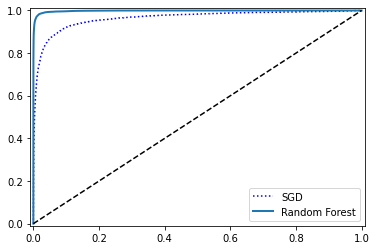

0.9983781778301529

In [26]:
y_probas_forest

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plt.margins(x=0.01, y=0.01)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)